In [77]:
# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Scikit-learn importations
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, classification_report

In [78]:
# Loading data
print("===== Chargement CSV Data =====")
urls_data = pd.read_csv("url_data.csv")
print(urls_data)

url_train = urls_data['URLs'][4]
print(url_train)

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

urls_data['count-digits'] = urls_data['URLs'].apply(lambda i: digit_count(i))
urls_data['count.'] = urls_data['URLs'].apply(lambda i: i.count('.'))

urls_data.head()

===== Chargement CSV Data =====
                                                     URLs Class
0                         freebase.com/view/en/bob_sirois  good
1                          en.wikipedia.org/wiki/Joie_Lee  good
2                pipl.com/directory/people/Rejean/Beaudin  good
3       flickr.com/photos/teneyck/sets/72157610336209297/  good
4       ussoccer.com/News/Federation-Services/2009/06/...  good
...                                                   ...   ...
420459  ourorigins.org/genealogielistfirstname.aspx?an...  good
420460    simira.co.id/cifk/live.com/Account_Verified.htm   bad
420461  kstatesports.com/sports/w-baskbl/spec-rel/ksu-...  good
420462  vh1.com/video/living-colour/9128/cult-of-perso...  good
420463     absoluteastronomy.com/topics/SummerSlam_(1990)  good

[420464 rows x 2 columns]
ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx


,URLs,Class,count-digits,count.
0,freebase.com/view/en/bob_sirois,good,0,1
1,en.wikipedia.org/wiki/Joie_Lee,good,0,2
2,pipl.com/directory/people/Rejean/Beaudin,good,0,1
3,flickr.com/photos/teneyck/sets/72157610336209297/,good,17,1
4,ussoccer.com/News/Federation-Services/2009/06/...,good,6,2


In [79]:
# Split intro training and testing data sets
print("===== Séparation dataset entrainement et test =====")
train_data, test_data = train_test_split(urls_data, test_size=0.2, random_state=42)

labels = train_data['Class']
test_labels = test_data['Class']

print(test_data)

===== Séparation dataset entrainement et test =====
                                                     URLs Class  count-digits  \
153858  en.wikipedia.org/wiki/Uptown_Theater_(Kansas_C...  good             0   
268846  kktv.com/sports/headlines/Mountain_West_Confer...  good            15   
119204                             flashionista.org/?p=49  good             2   
225271  3designcenter.com/blog/wp-admin/network/other/...   bad             9   
147290  obits.dignitymemorial.com/dignity-memorial/obi...  good            20   
...                                                   ...   ...           ...   
342695  gunandgame.com/forums/powder-keg/11904-abrams-...  good             5   
242466  bbb.org/nashville/business-reviews/bed-and-bre...  good             8   
326876  torrentspath.com/30243201/sky-b-high-b-ent-sky...  good            12   
348490                                   secstate.wa.gov/  good             0   
91572                       bg-globalmarketing.com/87yfhc

===== Informations sur les 2 dataset résultants =====

Longueur data set entrainement : 336371
Longueur data set test : 84093


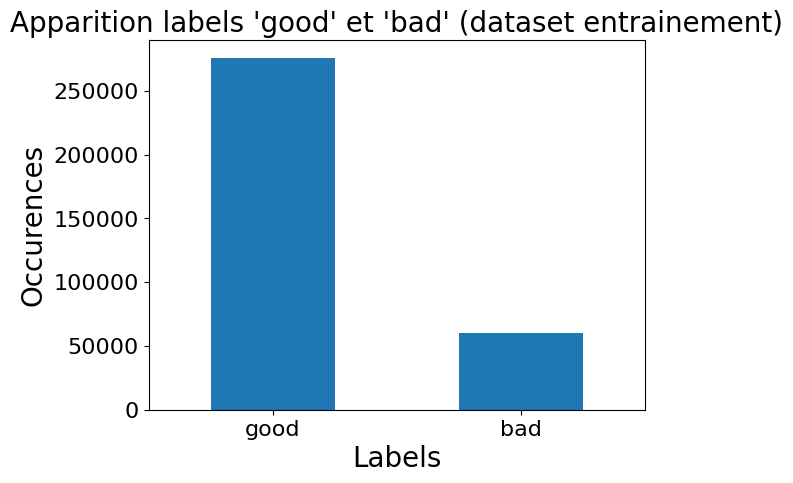

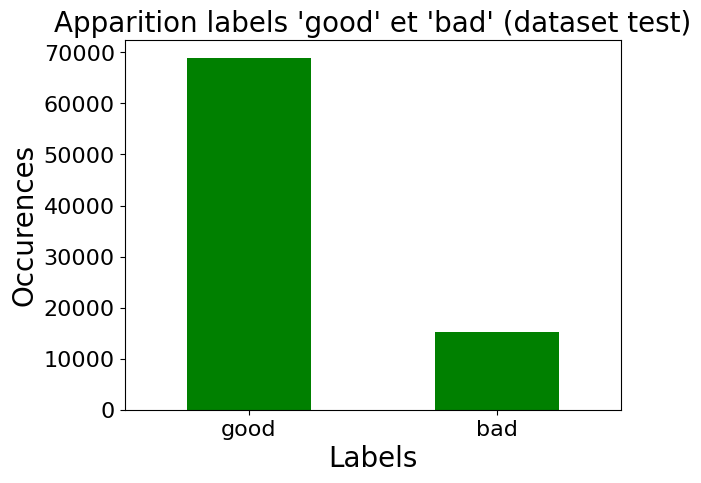

In [80]:
print("===== Informations sur les 2 dataset résultants =====")
print()
print("Longueur data set entrainement :", len(train_data))
print("Longueur data set test :", len(test_data))

# Graphes pour compter le nombre de "good" et "bad" pour chaque dataset
count_train_classes = pd.value_counts(train_data['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Apparition labels 'good' et 'bad' (dataset entrainement)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Labels", fontsize=20)
plt.ylabel("Occurences", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_data['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Apparition labels 'good' et 'bad' (dataset test)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Labels", fontsize=20)
plt.ylabel("Occurences", fontsize=20)

plt.show()

In [81]:
# Definition du tokeniser

def tokenizer(url):  
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  #print(tokens)
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      
      tokens += dot_split
      
  return tokens

def tokenizer2(url):  
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
      
  return tokens

print(url_train)
print(tokenizer(url_train))


ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx
['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


In [96]:
# Vectorisation des dataset

# CountVectorizer
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_data['URLs'])

# TfidfVectorizer
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_data['URLs'])

  (0, 145438)	1
  (0, 340944)	1
  (0, 327481)	1
  (0, 340168)	1
  (0, 145437)	1
  (0, 340159)	1
  (0, 275407)	1


In [94]:
test_count_X = cVec.transform(test_data['URLs'])
test_tfidf_X = tVec.transform(test_data['URLs'])

Accuracy :  0.8281188683957048


In [84]:
print("===== Modele : Multinomial Naive Bayesian avec TfidfVectorizer =====")
# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
print("Accuracy : ", score_mnb_tfidf)

# predict the labels of the test set
pred_labels = mnb_tfidf.predict(test_tfidf_X)

'''
# calculate the f1 score
f1 = f1_score(test_labels, pred_labels, pos_label="good")

# calculate the recall score
recall = recall_score(test_labels, pred_labels, pos_label='good')

# print the f1 score
print("F1 Score: ", f1)

# print the recall score
print("Recall Score: ", recall)'''

print(classification_report(test_labels, pred_labels))

===== Modele : Multinomial Naive Bayesian avec TfidfVectorizer =====
Accuracy :  0.9670246037125564
              precision    recall  f1-score   support

         bad       0.99      0.82      0.90     15136
        good       0.96      1.00      0.98     68957

    accuracy                           0.97     84093
   macro avg       0.98      0.91      0.94     84093
weighted avg       0.97      0.97      0.97     84093



In [85]:
print("===== Modele : Multinomial Naive Bayesian avec CountVectorizer =====")

print(count_X.shape)
print(train_data.shape)
# Train the model
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
print("Accuracy : ", score_mnb_count)

# predict the labels of the test set
pred_labels = mnb_count.predict(test_count_X)

X_predict = ["https://www.youtube.com/watch?v=ce2F_FHE4xs"]
X_predict = cVec.transform(X_predict)
print(mnb_count.predict(X_predict))

print(classification_report(test_labels, pred_labels))

===== Modele : Multinomial Naive Bayesian avec CountVectorizer =====
(336371, 575564)
(336371, 4)
Accuracy :  0.9769659781432461
['good']
              precision    recall  f1-score   support

         bad       0.97      0.90      0.93     15136
        good       0.98      0.99      0.99     68957

    accuracy                           0.98     84093
   macro avg       0.98      0.95      0.96     84093
weighted avg       0.98      0.98      0.98     84093



In [86]:
print("===== Modele : Logisitque Regression avec TfidfVectorizer =====")
# Train the model
lr_tfidf = LogisticRegression(max_iter = 200)
lr_tfidf.fit(tfidf_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_lr_tfidf = lr_tfidf.score(test_tfidf_X, test_labels)
print("Accuracy : ", score_lr_tfidf)

# predict the labels of the test set
pred_labels = mnb_tfidf.predict(test_tfidf_X)

print(classification_report(test_labels, pred_labels))

===== Modele : Logisitque Regression avec TfidfVectorizer =====
Accuracy :  0.9631836181370625
              precision    recall  f1-score   support

         bad       0.99      0.82      0.90     15136
        good       0.96      1.00      0.98     68957

    accuracy                           0.97     84093
   macro avg       0.98      0.91      0.94     84093
weighted avg       0.97      0.97      0.97     84093



In [87]:
print("===== Modele : Logistique Regression avec CountVectorizer =====")
# Train the model
lr_count = LogisticRegression(max_iter = 200)
lr_count.fit(count_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_lr_count = lr_count.score(test_count_X, test_labels)
print("Accuracy : ", score_lr_count)

# predict the labels of the test set
pred_labels = mnb_count.predict(test_count_X)

print(classification_report(test_labels, pred_labels))

===== Modele : Logistique Regression avec CountVectorizer =====


/home/quentin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9727444614890657
              precision    recall  f1-score   support

         bad       0.97      0.90      0.93     15136
        good       0.98      0.99      0.99     68957

    accuracy                           0.98     84093
   macro avg       0.98      0.95      0.96     84093
weighted avg       0.98      0.98      0.98     84093



GRAPHIQUES
[96.70246037125564, 97.69659781432462, 96.31836181370626, 97.27444614890656]


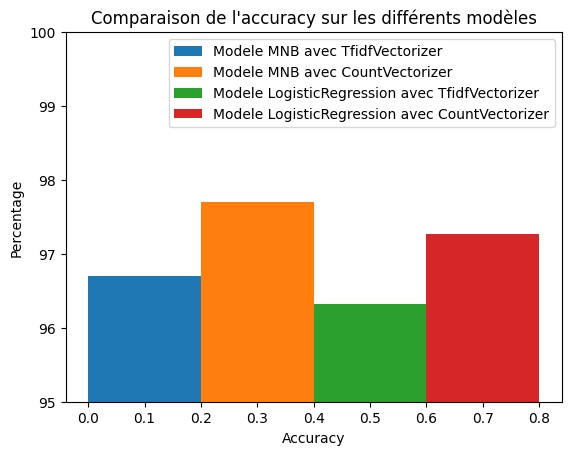

In [89]:
print("===== Comparaisons graphiques =====")

# Set up the plot
fig, ax = plt.subplots()

scores = [score_mnb_tfidf, score_mnb_count, score_lr_tfidf, score_lr_count]
scores = [score * 100 for score in scores]

# Plot the histograms
ax.bar(0.1, scores[0], width = 0.2, label="Modele MNB avec TfidfVectorizer")
ax.bar(0.3, scores[1], width = 0.2, label="Modele MNB avec CountVectorizer")
ax.bar(0.5, scores[2], width = 0.2, label="Modele LogisticRegression avec TfidfVectorizer")
ax.bar(0.7, scores[3], width = 0.2, label="Modele LogisticRegression avec CountVectorizer")

# Set the x and y limits
ax.set_ylim(95, 100)

# Set the x and y labels
ax.set_xlabel("Accuracy")
ax.set_ylabel("Percentage")
ax.set_title("Comparaison de l'accuracy sur les différents modèles")

# Add a legend
ax.legend()

# Show the plot
plt.show()
